<a href="https://colab.research.google.com/github/prabhashkumar11/EDA-Air-_quality/blob/main/EDA_air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# India Air Quality Exploratory Data Analysis
- Air is what keeps humans alive. Monitoring it and understanding its quality  is of immense importance to our well-being.

## Todo - Talk about the datset(source, what it contains , how it will be useful)
- kaggle
- information about pollution
- can use useful to improve air quality

In [22]:
# necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Importing the Data 

In [23]:
city_day = "city_day.csv"
city_df = pd.read_csv(city_day)

In [24]:
#reading the data
city_df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [25]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**There seems to have lot of missing values and Date columns is also not in date time format** 

# Data Prepration and cleaning

In [26]:
city_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [27]:
#Numericals Columns

numericals_df= city_df.select_dtypes(include=np.number)
numericals_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [28]:
numericals_df.columns.tolist()

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

**Missing values**

it is always a good idea to see the missing values as a percentage of total values

In [29]:
#percentage of missing values
missing_percentage = (city_df.isna().sum().sort_values(ascending=False)/len(city_df)) * 100
missing_percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [30]:
type(missing_percentage)

pandas.core.series.Series

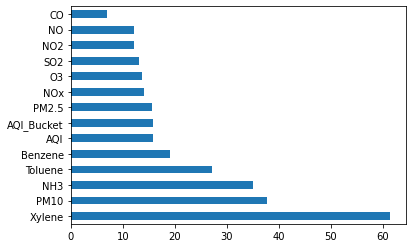

In [31]:
#plotting the missing percentage
missing_percentage[missing_percentage !=0].plot(kind="barh")

It seems that we have a lot of null values in some columns e.g.Xylene and NH3.There could be a couple of reasons for the missing data:
- Station does not have device to capture it.
- Issue in the meter reading.

In [32]:
# fixing missing values

city_df['PM2.5']=city_df['PM2.5'].fillna((city_df['PM2.5'].median()))
city_df['PM10']=city_df['PM10'].fillna((city_df['PM10'].median()))
city_df['NO']=city_df['NO'].fillna((city_df['NO'].median()))
city_df['NO2']=city_df['NO2'].fillna((city_df['NO2'].median()))
city_df['NOx']=city_df['NOx'].fillna((city_df['NOx'].median()))
city_df['NH3']=city_df['NH3'].fillna((city_df['NH3'].median()))
city_df['CO']=city_df['CO'].fillna((city_df['CO'].median()))
city_df['SO2']=city_df['SO2'].fillna((city_df['SO2'].median()))
city_df['O3']=city_df['O3'].fillna((city_df['O3'].median()))
city_df['Benzene']=city_df['Benzene'].fillna((city_df['Benzene'].median()))
city_df['Toluene']=city_df['Toluene'].fillna((city_df['Toluene'].median()))
city_df['Xylene']=city_df['Xylene'].fillna((city_df['Xylene'].median()))
city_df['AQI']=city_df['AQI'].fillna((city_df['AQI'].median()))
city_df['AQI_Bucket']=city_df['AQI_Bucket'].fillna('Moderate')

In [33]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**Cities in dataset**

In [34]:
cities = city_df['City']
values=cities.nunique()
print(f"total number of cities in the datasets is {values}")
print(cities.value_counts().index)


total number of cities in the datasets is 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')


**Convert to date time format**

In [35]:
city_df['Date']=pd.to_datetime(city_df['Date'])



**Data avaliablity**

In [ ]:
#print(f"The available data is between {city_day['Date'].min} and {city_day['Date'].max}")

# Exploratory Analysis and visualisation

**Pre Corona [2016 to 2020]**

Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [36]:
df = city_df.copy()
df=df[df['Date'] <= ('01-01-2020')]
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29344,Visakhapatnam,2019-12-28,74.53,95.68,4.21,33.50,21.25,9.72,1.21,6.30,42.20,5.58,9.34,2.23,110.0,Moderate
29345,Visakhapatnam,2019-12-29,41.00,95.68,2.37,20.94,13.07,6.78,0.74,6.25,70.48,3.76,12.04,0.71,133.0,Moderate
29346,Visakhapatnam,2019-12-30,44.79,95.68,3.22,35.67,21.58,11.14,1.06,9.71,77.40,4.41,7.69,2.16,118.0,Moderate
29347,Visakhapatnam,2019-12-31,52.33,99.33,3.51,33.70,20.78,11.69,1.13,8.44,70.91,4.67,8.70,1.64,92.0,Satisfactory


In [37]:
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  object        
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   AQI_Bucket                    24908 non-null  object        
 4   Vehicular Pollution content   24908 non-null  float64       
 5   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


In [41]:
df.head(10)



,City,Date,AQI,AQI_Bucket,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,2015-01-01,118.0,Moderate,197.31,161.02
1,Ahmedabad,2015-01-02,118.0,Moderate,194.19,71.56
2,Ahmedabad,2015-01-03,118.0,Moderate,243.90,85.22
3,Ahmedabad,2015-01-04,118.0,Moderate,199.95,70.24
4,Ahmedabad,2015-01-05,118.0,Moderate,263.48,107.32
5,Ahmedabad,2015-01-06,118.0,Moderate,370.90,110.45
6,Ahmedabad,2015-01-07,118.0,Moderate,555.81,65.75
7,Ahmedabad,2015-01-08,118.0,Moderate,455.33,70.43
8,Ahmedabad,2015-01-09,118.0,Moderate,297.42,84.43
9,Ahmedabad,2015-01-10,118.0,Moderate,177.92,12.84


**Most Polluted cities(Industrial Pollution content)**

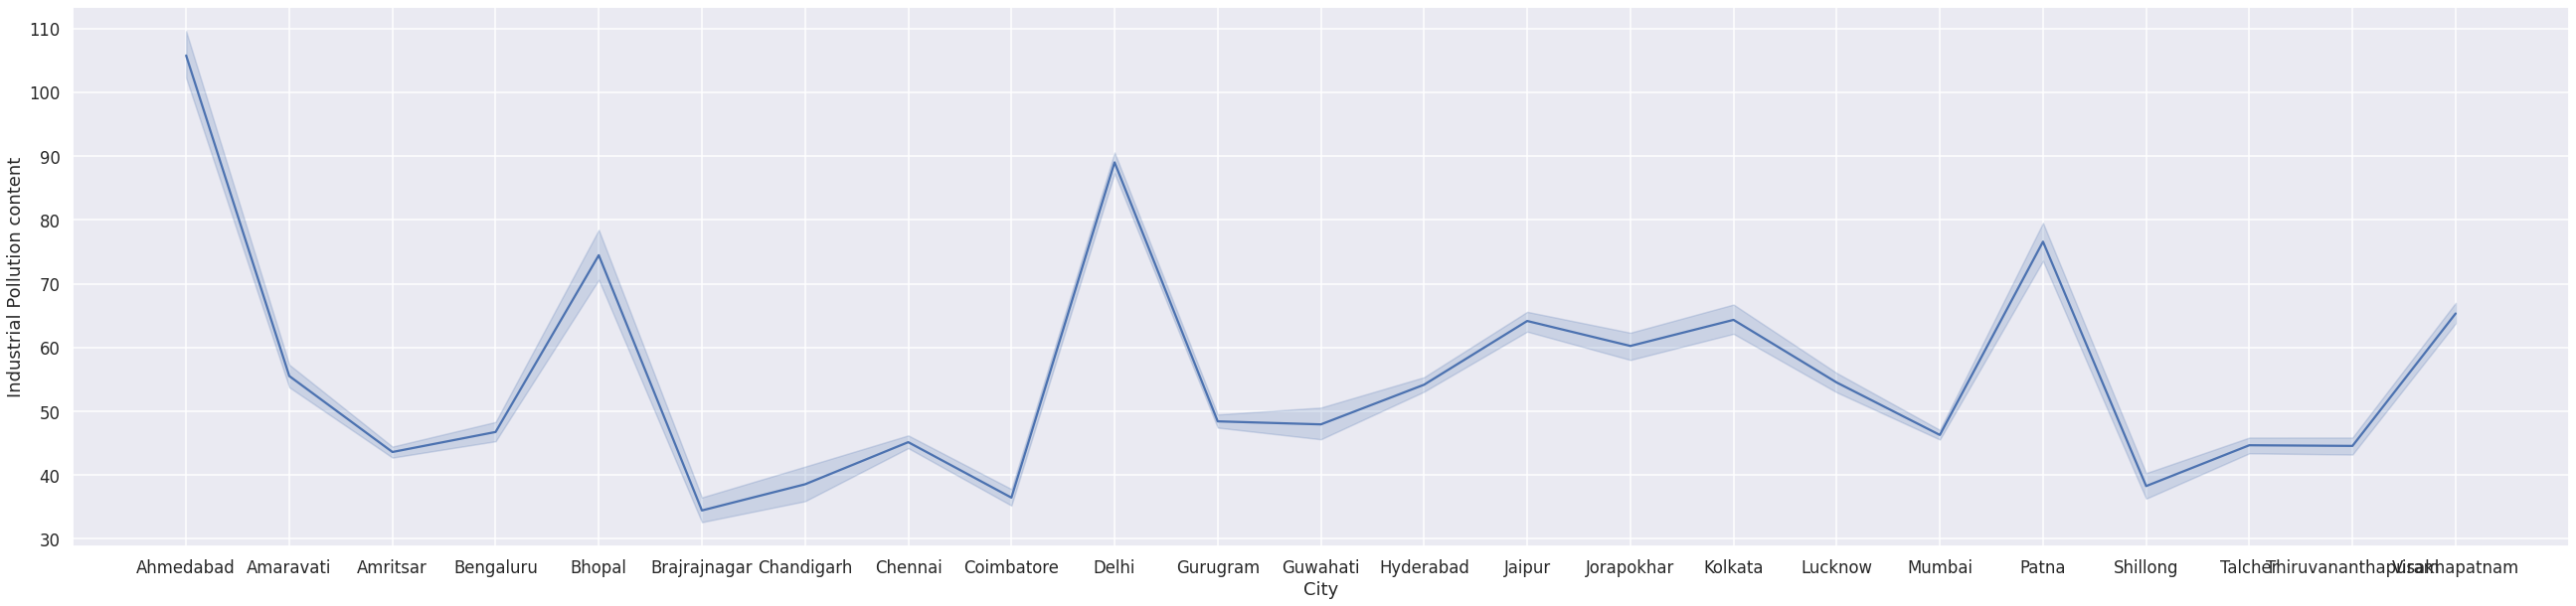

In [53]:
sns.set(rc = {'figure.figsize':(45,10)})
sns.set_theme(style="darkgrid", context="talk")
sns.lineplot(x='City',y='Industrial Pollution content', data=df)

**Most Polluted cities (vehicular Pollution content)**

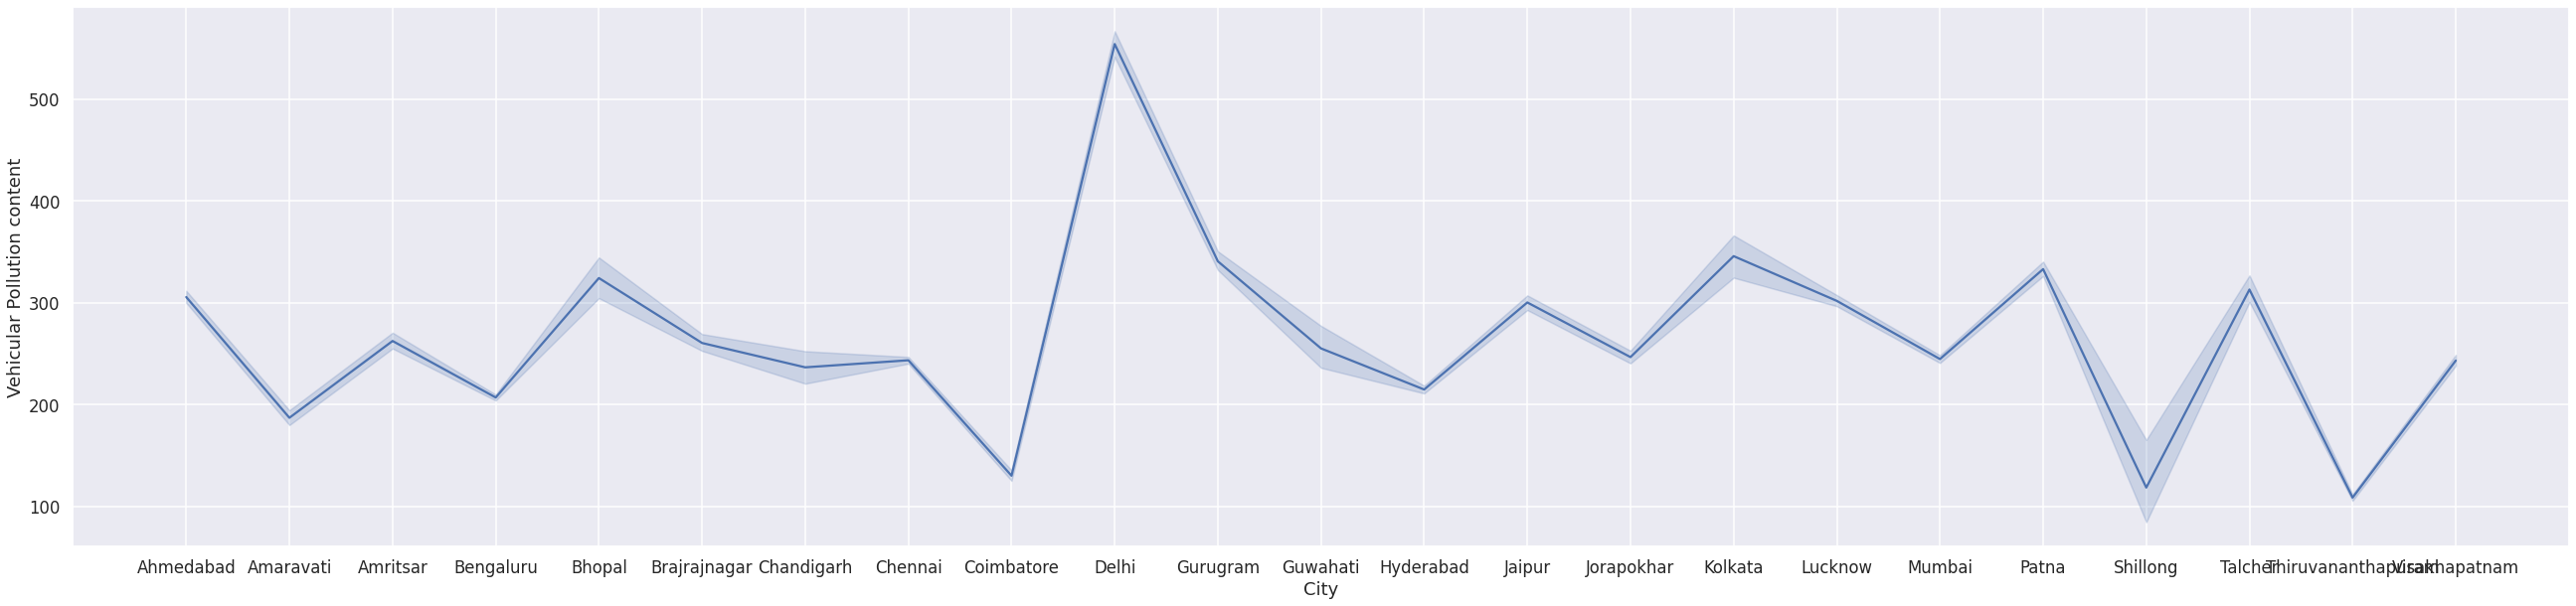

In [54]:
sns.set(rc = {'figure.figsize':(45,10)})
sns.set_theme(style="darkgrid", context="talk")
sns.lineplot(x='City',y='Vehicular Pollution content', data=df)

In [55]:
df1 = city_df.copy()
df1=df1[df1['Date'] > ('01-01-2020')]
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1827,Ahmedabad,2020-01-02,72.59,128.86,3.63,14.38,9.73,15.85,3.63,23.96,23.67,3.71,31.14,2.52,162.0,Moderate
1828,Ahmedabad,2020-01-03,69.54,128.99,7.06,15.13,12.65,15.85,7.06,35.78,23.66,4.78,31.14,2.52,220.0,Poor
1829,Ahmedabad,2020-01-04,66.20,138.47,8.97,20.79,16.84,15.85,8.97,38.98,23.65,4.12,31.14,2.52,254.0,Poor
1830,Ahmedabad,2020-01-05,55.99,110.41,5.41,15.34,11.53,15.85,5.41,45.83,23.61,3.30,31.14,2.52,255.0,Poor
1831,Ahmedabad,2020-01-06,46.96,109.44,7.17,16.88,13.58,15.85,7.17,38.11,23.64,2.75,31.14,2.52,175.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [56]:
df1['Vehicular Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO']+df1['NO2']+df1['NOx']+df1['NH3']+df1['CO']
df1['Industrial Pollution content'] = df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1 = df1.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4623 entries, 1827 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          4623 non-null   object        
 1   Date                          4623 non-null   datetime64[ns]
 2   AQI                           4623 non-null   float64       
 3   AQI_Bucket                    4623 non-null   object        
 4   Vehicular Pollution content   4623 non-null   float64       
 5   Industrial Pollution content  4623 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 252.8+ KB


In [57]:
df1.head(10)

,City,Date,AQI,AQI_Bucket,Vehicular Pollution content,Industrial Pollution content
1827,Ahmedabad,2020-01-02,162.0,Moderate,248.67,85.00
1828,Ahmedabad,2020-01-03,220.0,Poor,256.28,97.88
1829,Ahmedabad,2020-01-04,254.0,Poor,276.09,100.41
1830,Ahmedabad,2020-01-05,255.0,Poor,219.94,106.40
1831,Ahmedabad,2020-01-06,175.0,Moderate,217.05,98.16
1832,Ahmedabad,2020-01-07,285.0,Poor,300.97,118.66
1833,Ahmedabad,2020-01-08,157.0,Moderate,226.52,90.54
1834,Ahmedabad,2020-01-09,129.0,Moderate,175.80,106.83
1835,Ahmedabad,2020-01-10,129.0,Moderate,205.02,86.74
1836,Ahmedabad,2020-01-11,114.0,Moderate,213.71,105.43


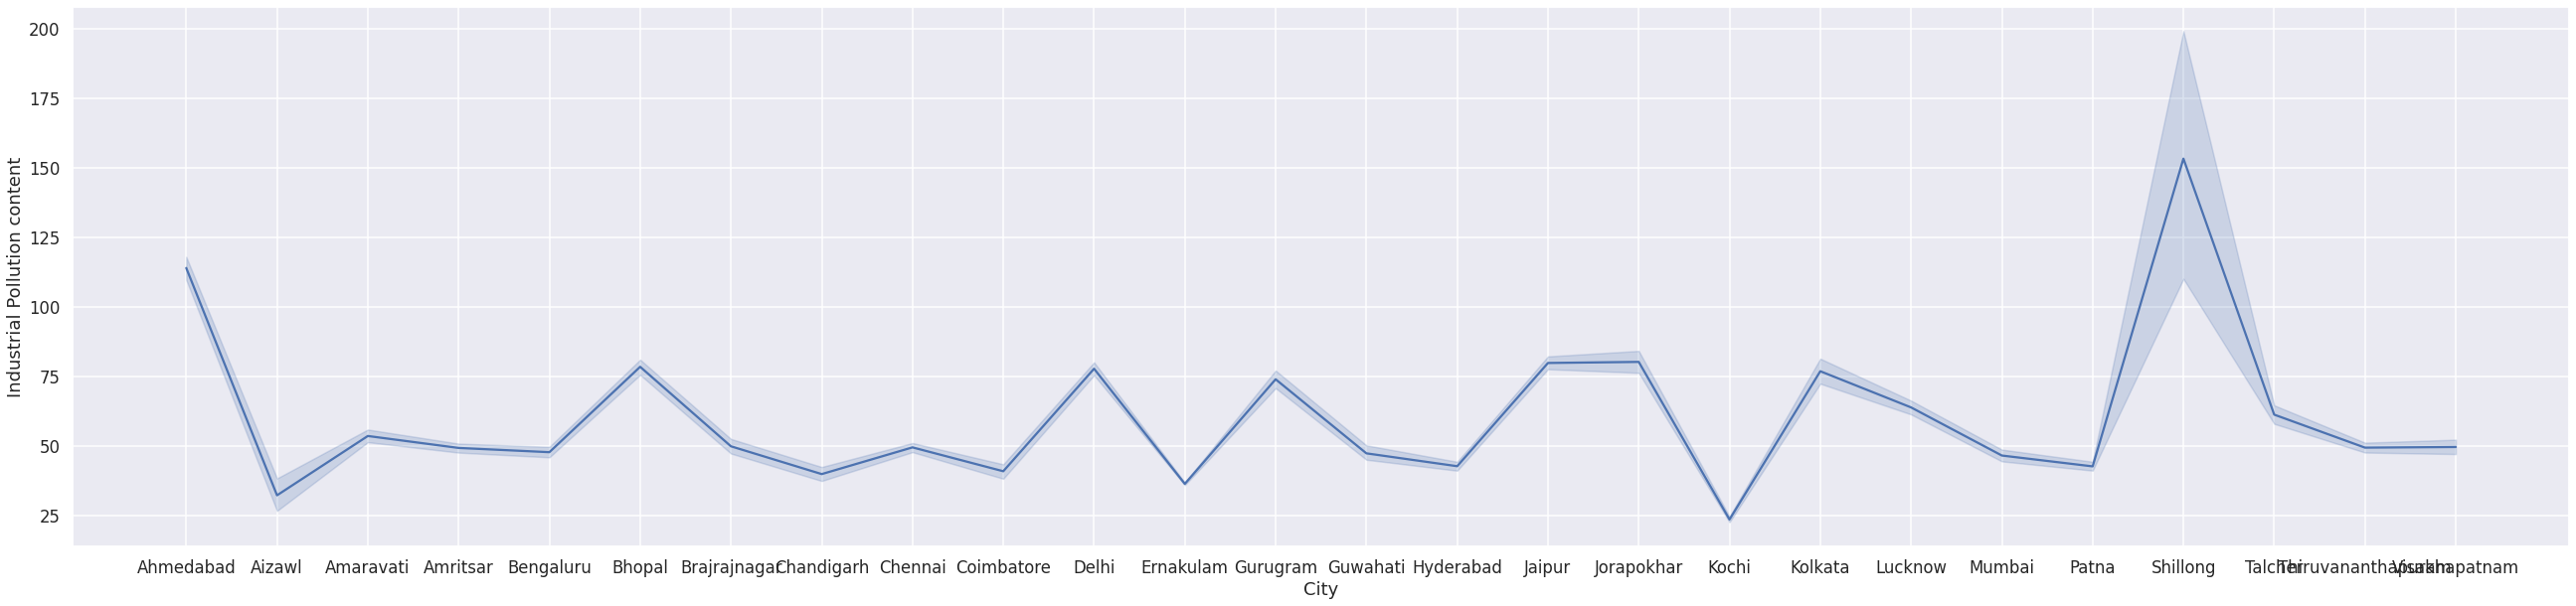

In [59]:
#plotting 
sns.set(rc = {'figure.figsize':(45,10)})
sns.set_theme(style="darkgrid", context="talk")
sns.lineplot(x='City',y='Industrial Pollution content', data=df1)


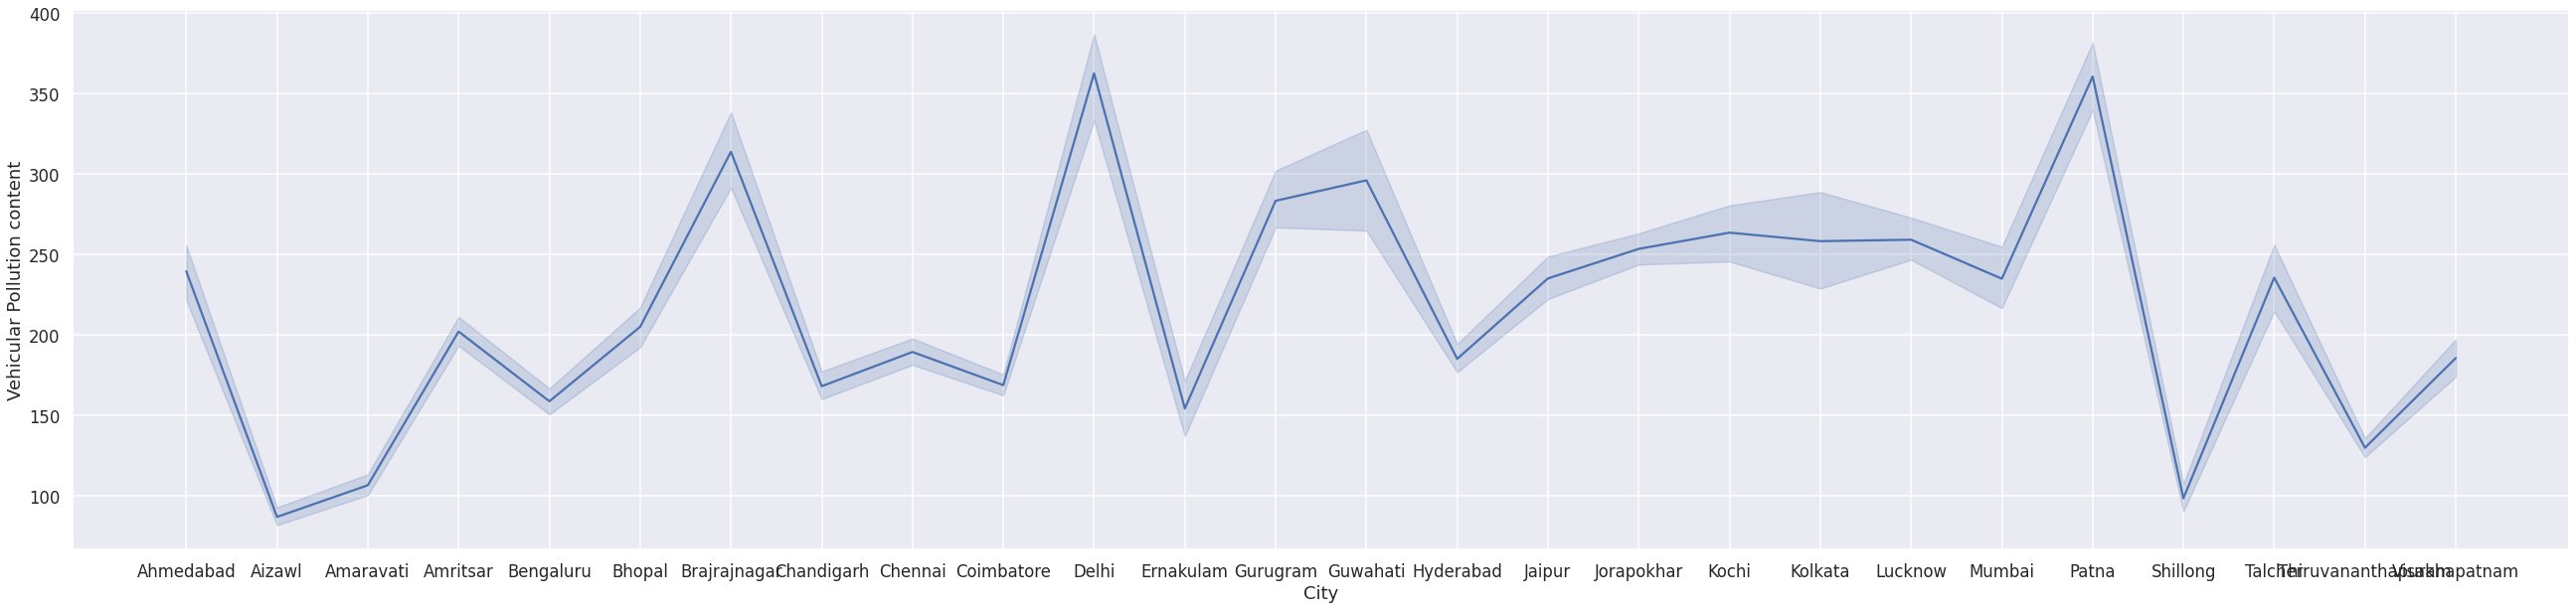

In [60]:
sns.set(rc = {'figure.figsize':(45,10)})
sns.set_theme(style="darkgrid", context="talk")
sns.lineplot(x='City',y='Vehicular Pollution content', data=df1)

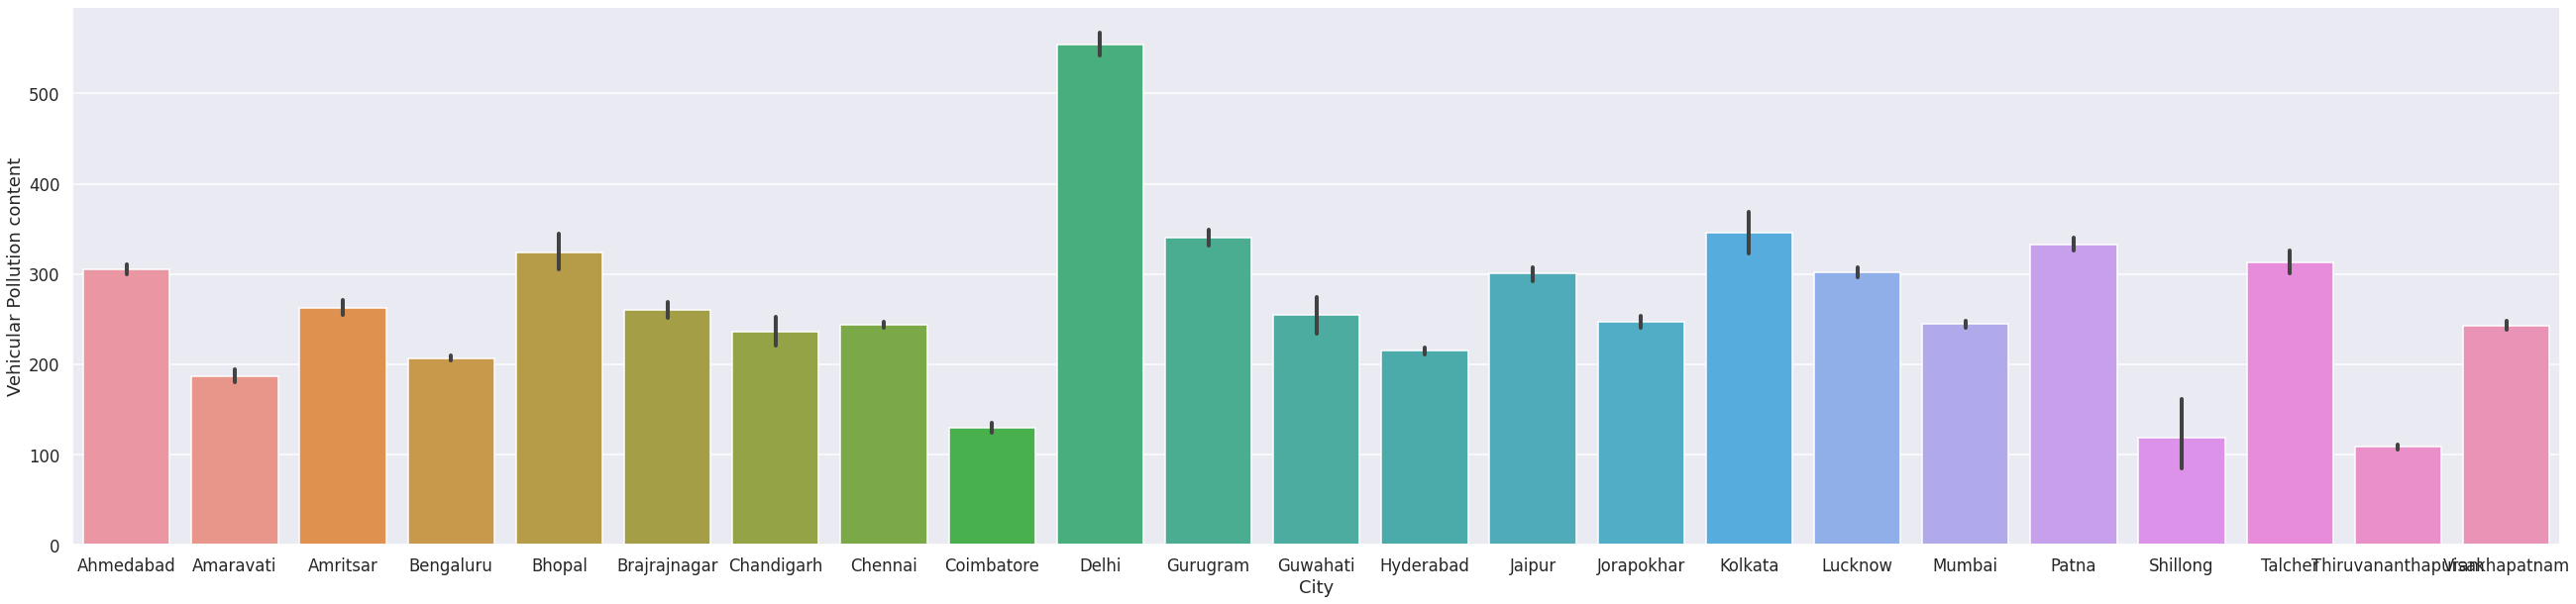

In [61]:
sns.set(rc = {'figure.figsize':(45,10)})
sns.set_theme(style="darkgrid", context="talk")
sns.barplot(x='City',y='Vehicular Pollution content', data=df)

# Ask & Answer questions

- Are there Pollution dependent on weather
- which 5 cities have high Pollution content both vehicular and industrial
- 

# Summary and Conclusion